# Librairies importation

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.io as sio
from scipy.stats import norm
from scipy.cluster.hierarchy import ward, fcluster
import scipy.stats
import itertools 
import math

import pcalg
import cdt
from cdt.metrics import SHD

import pgmpy
from gsq.ci_tests import ci_test_bin, ci_test_dis

from sklearn import preprocessing
import os

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fclusterdata
from scipy.cluster.hierarchy import dendrogram, linkage

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
from Plot_functions import *
from Structure_Learning import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def CI_test_pcalg(D,X,Y,Z):
    alpha=a
    
    n = D.shape[0]
    c = norm.ppf(1-alpha/2)
    columns = [X,Y] + list(Z)
    DD = D[:, columns]
    R = np.corrcoef(DD.T)
    P = np.linalg.inv(R)
    ro = -P[0,1] / np.sqrt(P[0,0] * P[1,1])
    zro = 0.5 * np.log((1+ro)/(1-ro))
    
    if np.abs(zro) < c / np.sqrt(n-len(Z)-3):
        CI = 1
    else:
        CI = 0
    
    return CI

# Inputs

In [12]:
# confidence threshold
a = 0.001

# list of operation considered for analysis
op = ['POS_LP1', 'T04', 'T10','T14', 'T05','ZFID04', 'T13', 'POS_ZFID05',
       'ZFID05', 'ZFID09', 'TC1', 'ZFID03', 'T17', 'ZBBK01', 'POS_ZFID04','CO2']

# link type
methode = 'complete'

# Hyperparameter optimization: confidence interval

### First optimization (large range of value)

In [8]:
alpha = [0.5,0.2,0.1,0.01,0.001,0.0001]
distances = []
name = []
count = 0
for a in alpha:
    count += 1
    progressBar(count, len(alpha),barLength = 20)
    shd_dist,skeleton,stores  = Country_structure('FRA',a,op,independence_test=CI_test_pcalg)
    dist,cluster = Predict_labels_Alt(shd_dist,1,skeleton,methode= methode)
    name = name + ['a = ' + str(a)  for l in range(len(dist))]
    distances = distances + dist

In [9]:
max(distances) / 2

37.0

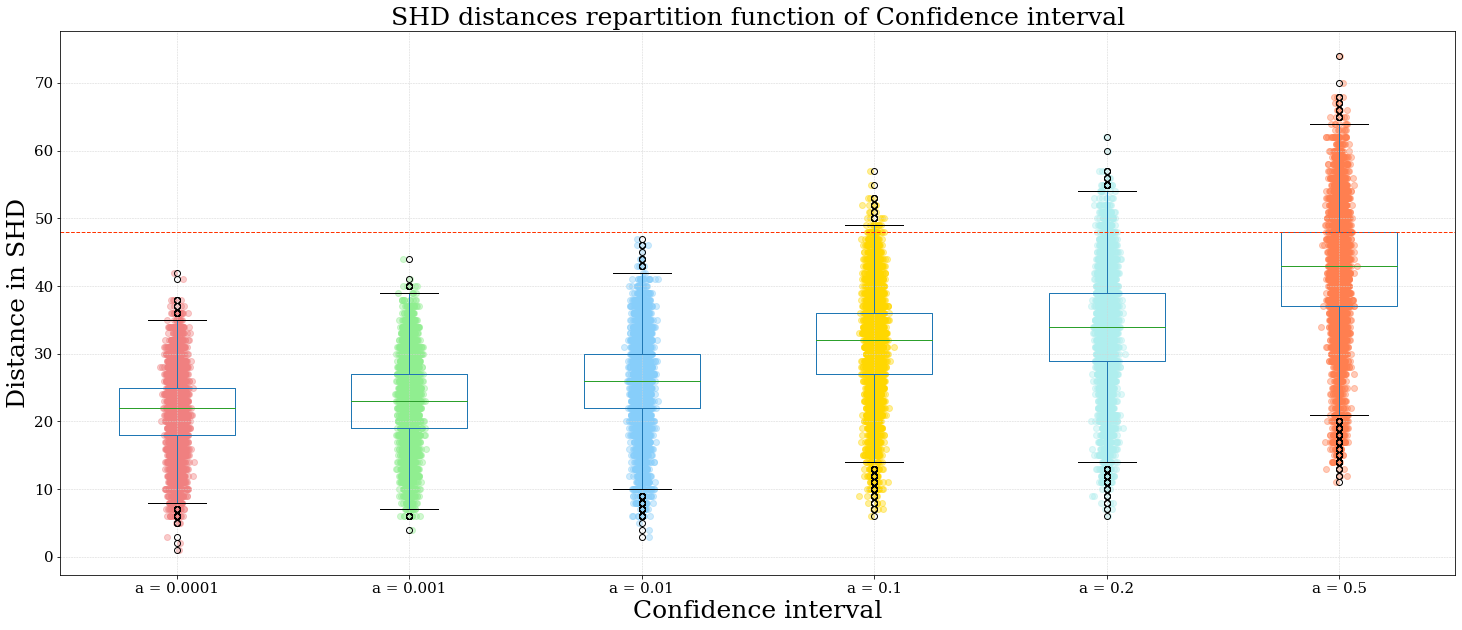

In [10]:
Box_plot(distances,name,'Confidence interval',48)

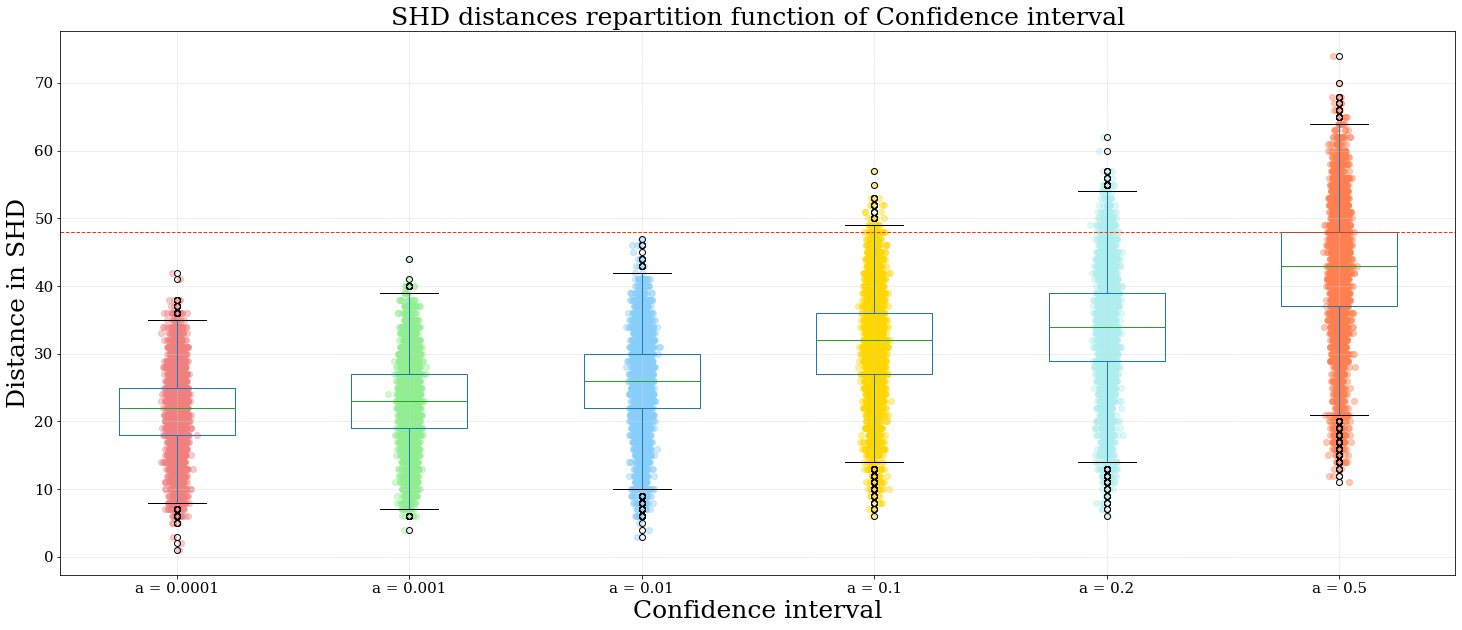

In [13]:
alpha = [0.5,0.2,0.1,0.01,0.001,0.0001]
distances = []
name = []
count = 0
for a in alpha:
    count += 1
    progressBar(count, len(alpha),barLength = 20)
    shd_dist,skeleton,stores  = Country_structure('FRA',a,op,independence_test=CI_test_pcalg)
    dist,cluster = Predict_labels_Alt(shd_dist,1,skeleton,methode= 'average')
    name = name + ['a = ' + str(a)  for l in range(len(dist))]
    distances = distances + dist
Box_plot(distances,name,'Confidence interval',48)

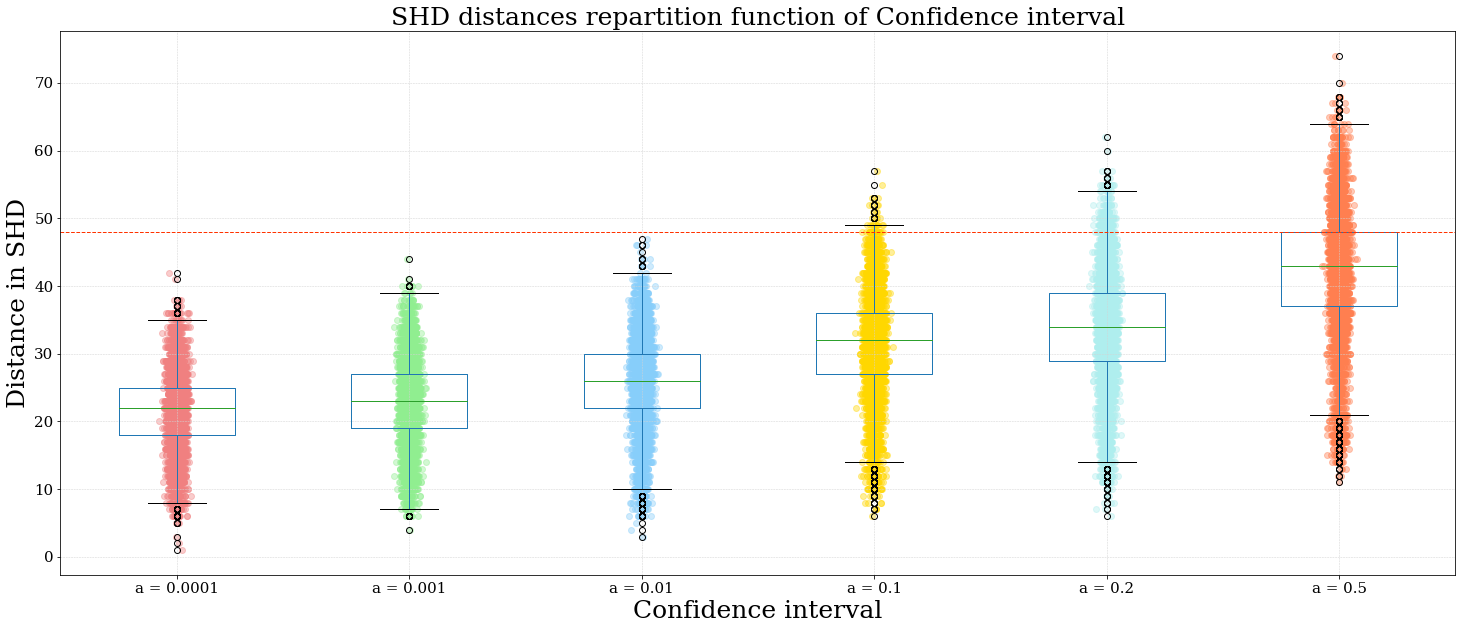

In [14]:
alpha = [0.5,0.2,0.1,0.01,0.001,0.0001]
distances = []
name = []
count = 0
for a in alpha:
    count += 1
    progressBar(count, len(alpha),barLength = 20)
    shd_dist,skeleton,stores  = Country_structure('FRA',a,op,independence_test=CI_test_pcalg)
    dist,cluster = Predict_labels_Alt(shd_dist,1,skeleton,methode= 'single')
    name = name + ['a = ' + str(a)  for l in range(len(dist))]
    distances = distances + dist
Box_plot(distances,name,'Confidence interval',48)

### More precise optimization (restricted range of value)

In [11]:
#alpha = [0.0012,0.0011,0.001,0.0009,0.0007,0.0005,0.0003,0.0001]
alpha = [0.001,0.0007,0.0003]
distances = []
name = []
count = 0
for a in alpha:
    count += 1
    progressBar(count, len(alpha),barLength = 20)
    shd_dist,skeleton,stores  = Country_structure('FRA',a,op,independence_test=CI_test_pcalg)
    dist,cluster = Predict_labels_Alt(shd_dist,1,skeleton,methode = methode)
    name = name + ['a = ' + str(a)  for l in range(len(dist))]
    distances = distances + dist

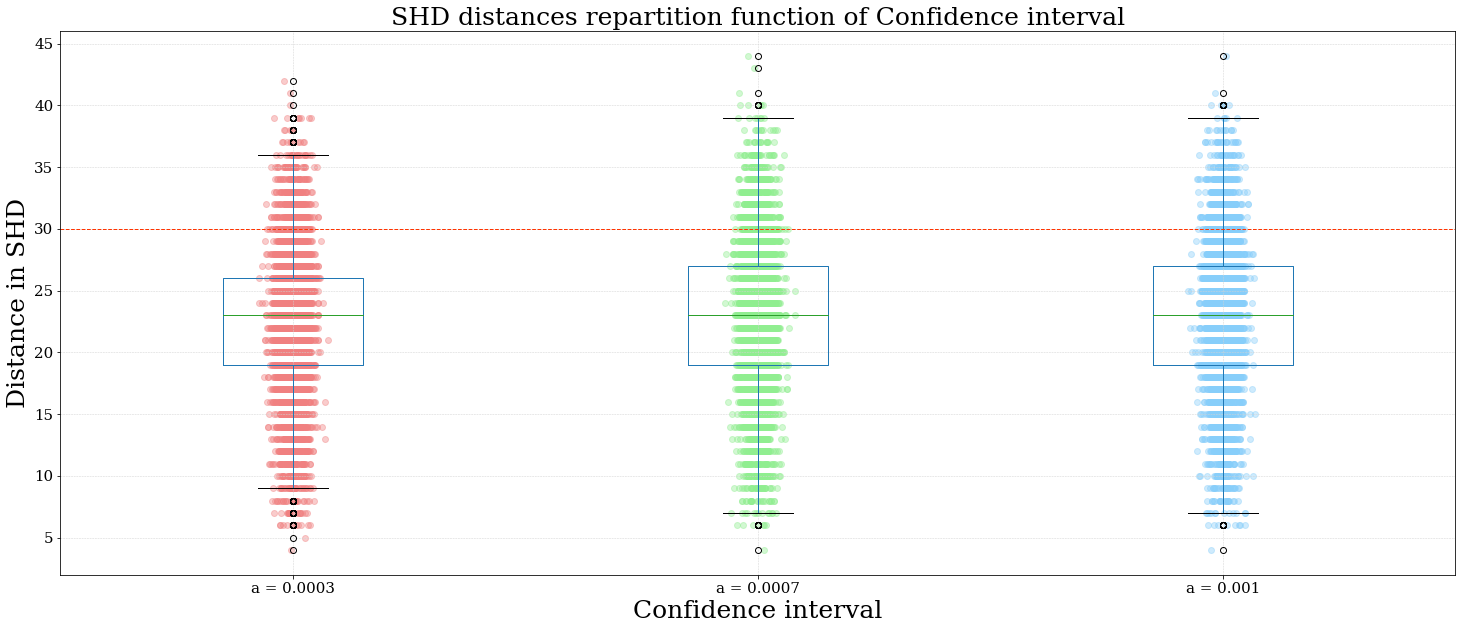

In [12]:
Box_plot(distances,name,'Confidence interval',30)

# Hyperparameter optimization: linkage type

In [13]:
a = 0.001

In [14]:
link = ['ward','complete', 'average', 'single']
distances = []
name = []
count = 0

shd_dist,skeleton,stores  = Country_structure('FRA',a,op,independence_test=CI_test_pcalg)
for l in link:
    count += 1
    progressBar(count, len(link),barLength = 20)
    dist,cluster = Predict_labels_Alt(shd_dist,1,skeleton,methode=l)
    name = name + ['Method = ' + l  for i in range(len(dist))]
    distances = distances + dist

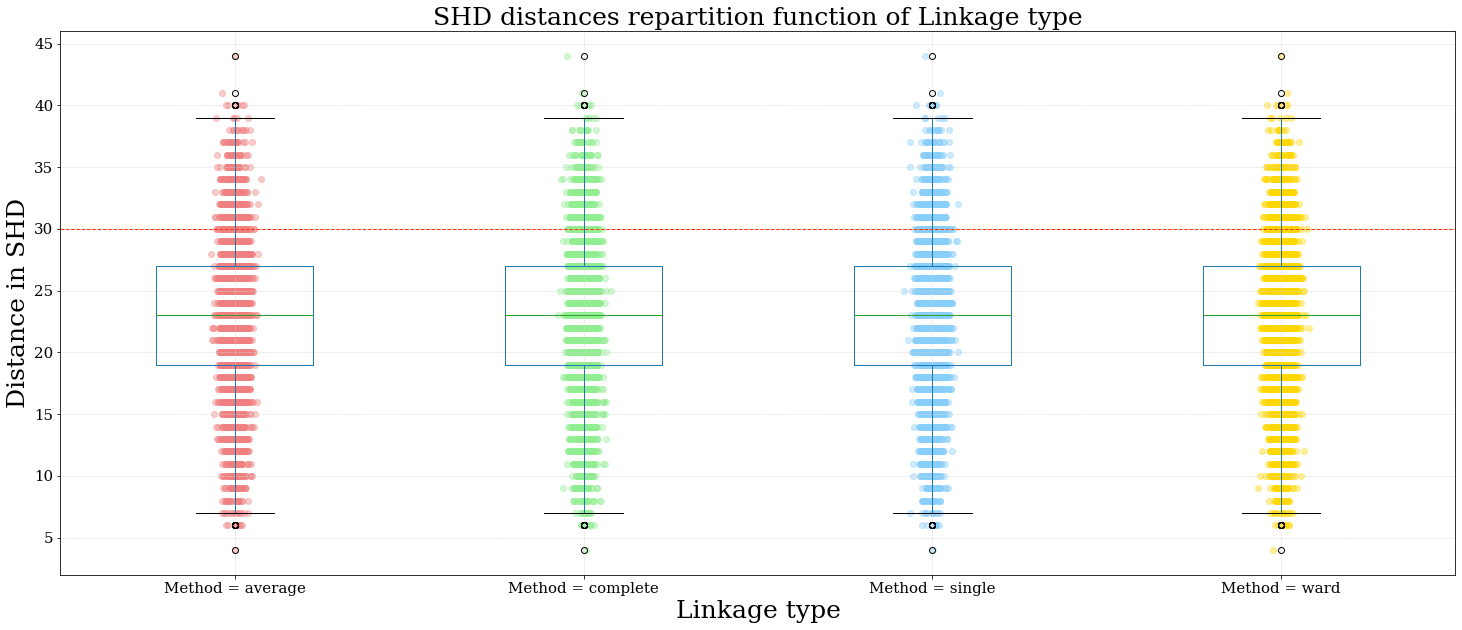

In [15]:
Box_plot(distances,name,'Linkage type',30)

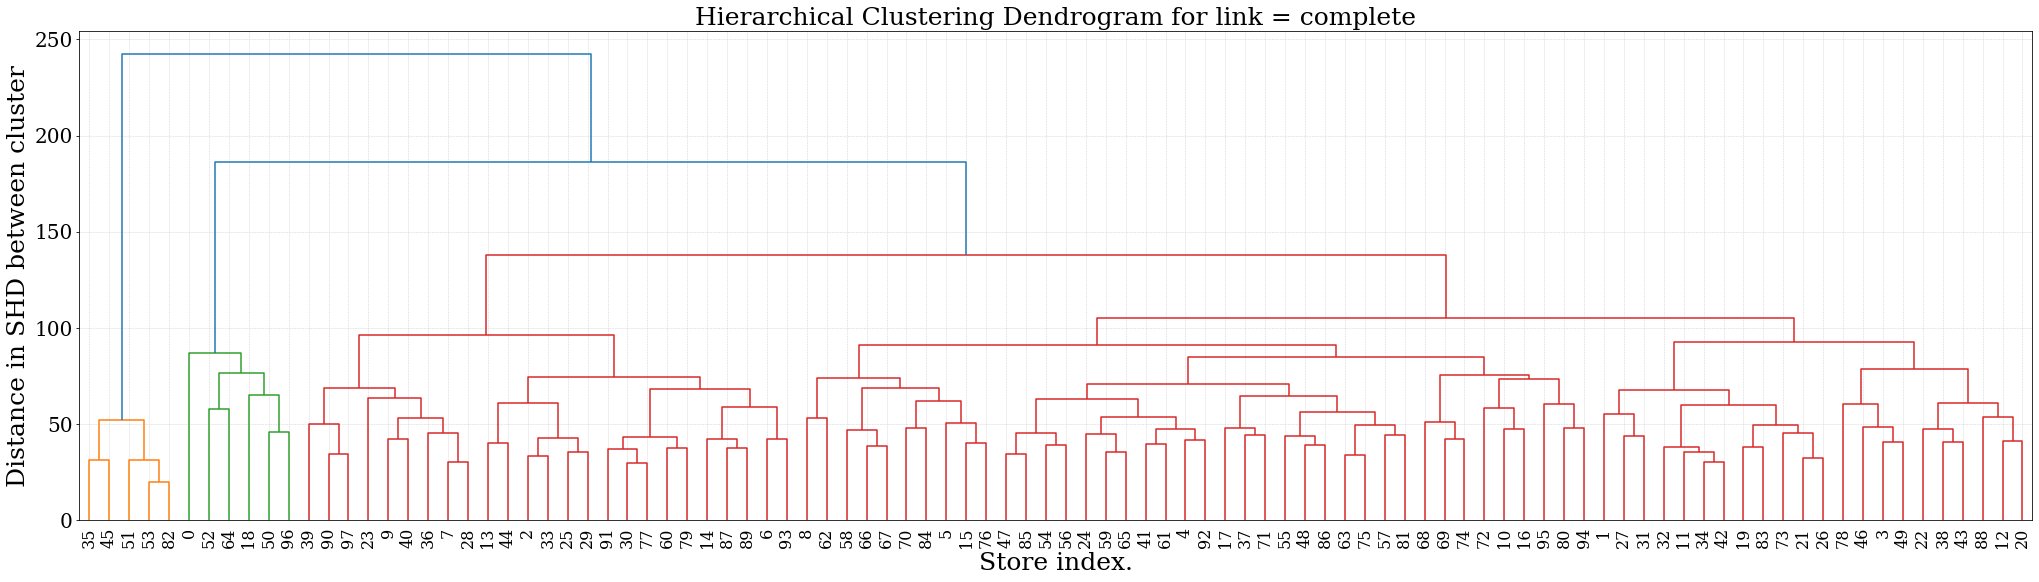

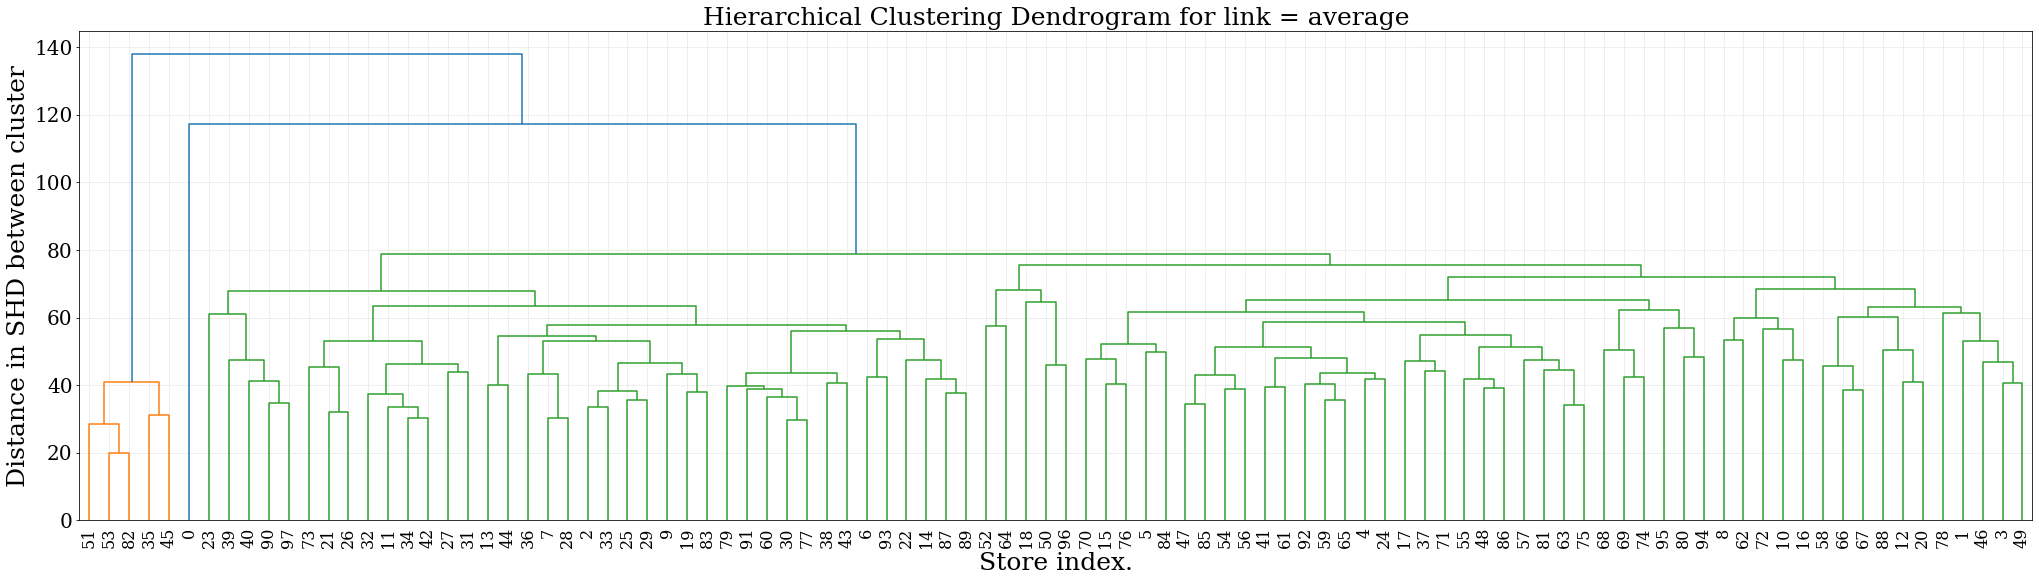

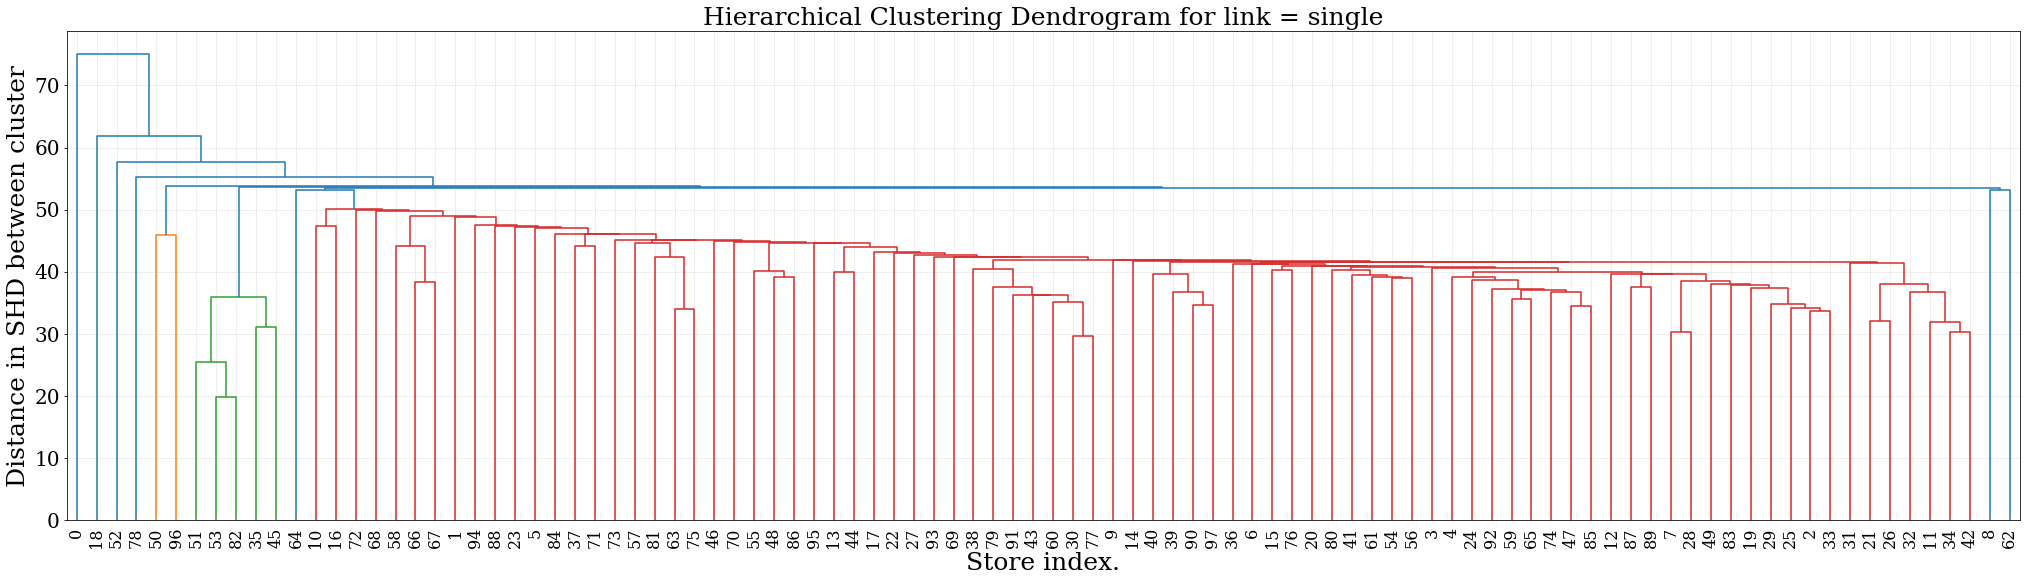

In [16]:
link = ['complete', 'average', 'single']
for l in link:
    Plot_dendrogram(shd_dist,title = 'Hierarchical Clustering Dendrogram for link = ' + str(l),
                    methode=l,size_x=35,size_y=9)

# Identify the optimal number of clusters

In [6]:
shd_dist,skeleton,stores  = Country_structure('FRA',0.001,op,independence_test=CI_test_pcalg)

### Plot dendrogram

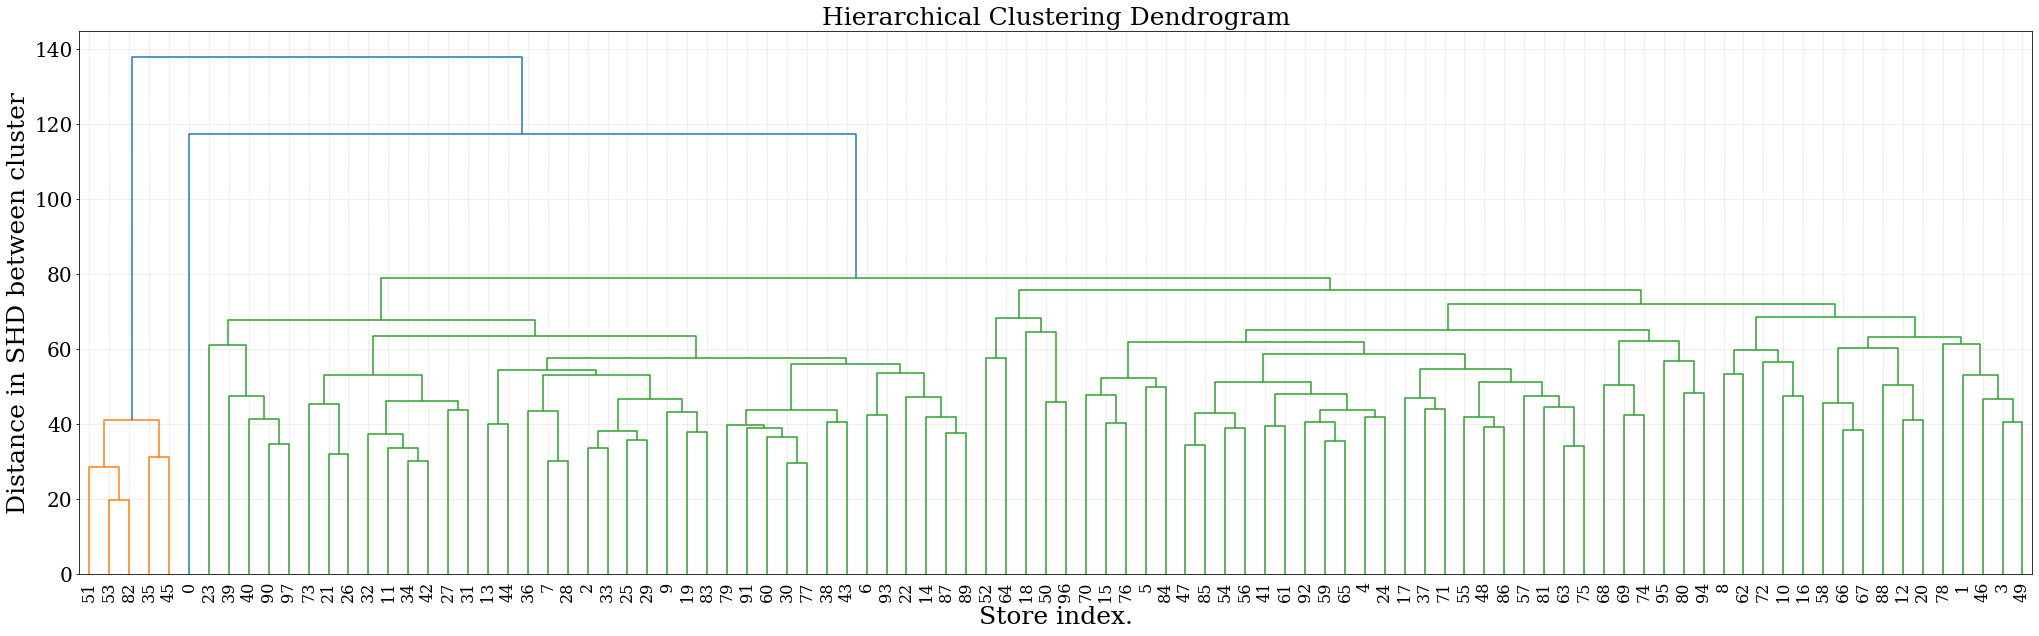

In [18]:
Plot_dendrogram(shd_dist,title = 'Hierarchical Clustering Dendrogram',
                methode='average',size_x=35,size_y=10)

### Intra cluster variance function of n_cluster

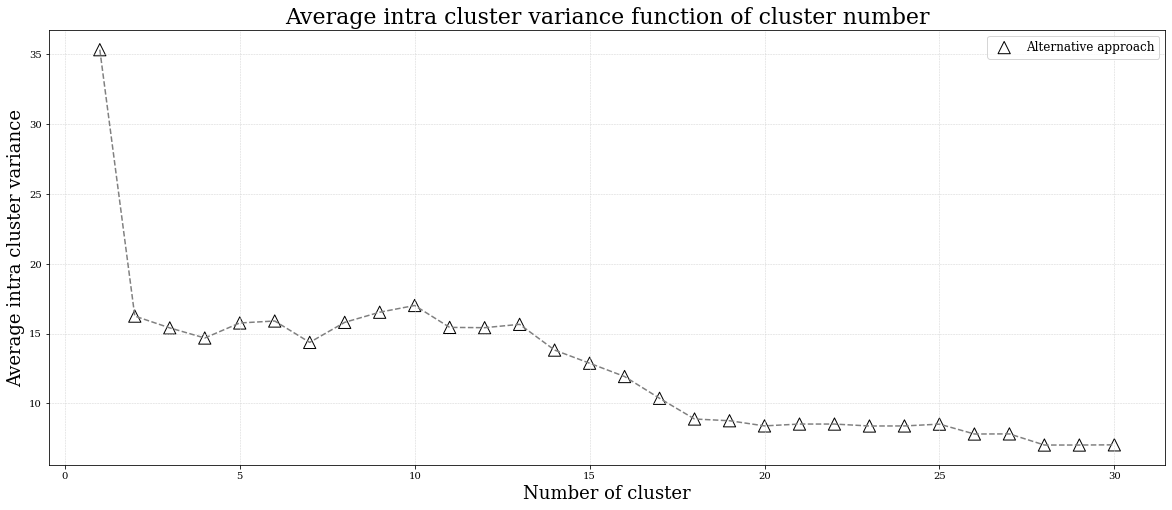

In [11]:
Plot_Variance(shd_dist,30,skeleton,'average',
              'Average intra cluster variance function of cluster number',20,8)

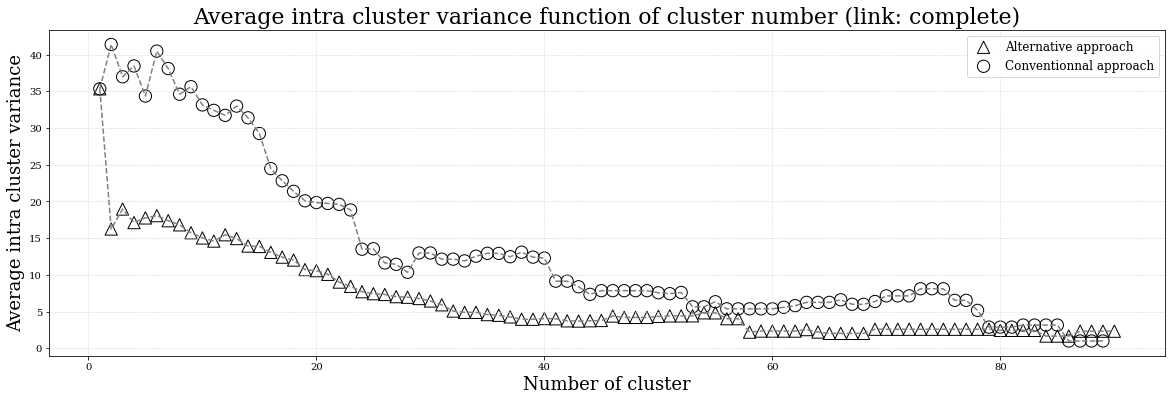

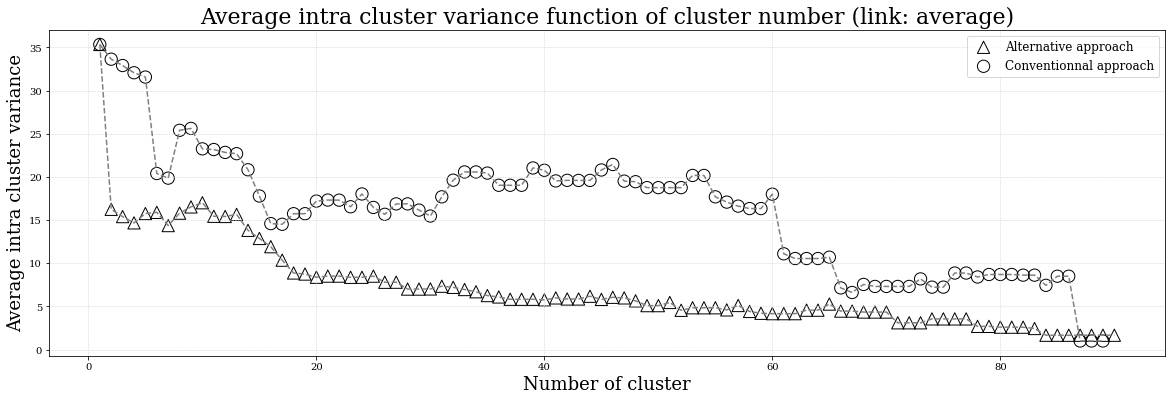

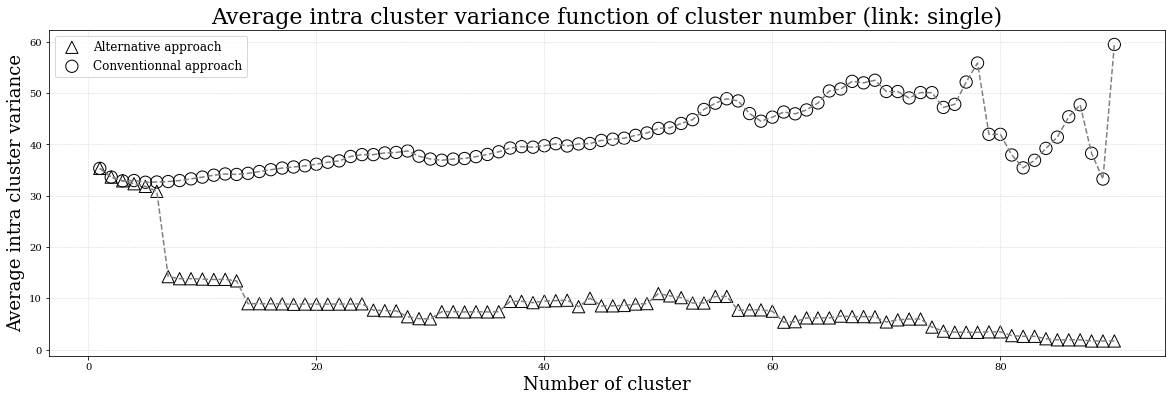

In [9]:
link = ['complete', 'average', 'single']
for l in link:
    Plot_Variance_Evolution(shd_dist,90,skeleton,l,
                            'Average intra cluster variance function of cluster number (link: '+l+')',
                            20,6)

# Optimal parameters after optimization

In [21]:
# Confidence interval
a = 0.001

# Linkage type
methode = 'complete'

# Conditionnal independence test
#Condi_Indep_test = CI_test_pcalg

# Optimal number of clusters
n_cluster = 4

# Country selection
country = 'FRA'

# Causal network visualization

In [22]:
shd_dist,skeleton,stores  = Country_structure('FRA',a,op,independence_test=CI_test_pcalg)

KeyboardInterrupt: 

In [ ]:
Plot_Clusters_Network(shd_dist,n_cluster,methode,skeleton,15,15)

# MAP

In [ ]:
Z = linkage(shd_dist, method=methode)
labels = fcluster(Z,n_cluster,criterion='maxclust')

In [ ]:
# import data on store coordinates
Store_ref = pd.read_excel('Store_Geo.xlsx')
# preprocess data
Store_ref = Store_ref.dropna()
mask = [Store_ref['POS Code'][i] in stores for i in Store_ref.index]
Store_ref = Store_ref[mask]
Store_ref['lat'] = [float(Store_ref['Latitude Longitude'][i].split(',')[0]) for i in Store_ref.index]
Store_ref['lon'] = [float(Store_ref['Latitude Longitude'][i].split(',')[1]) for i in Store_ref.index]
Store_ref['Cluster'] = [labels[np.where(np.array(stores) == Store_ref['POS Code'][i])][0] for i in Store_ref.index]
Store_ref['Size'] = 2
Store_ref['Cluster'] = Store_ref['Cluster'].astype(str)

In [ ]:
fig = px.scatter_mapbox(Store_ref,title='Geographical visualization of cluster assignement',
                        lat="lat", lon="lon", hover_name="Cluster", hover_data=["Designation"],
                        color='Cluster',labels='Cluster' ,size='Size',opacity=0.8, zoom=5, height=700,
                       mapbox_style='carto-positron')

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [ ]:
Store_ref['Store brand'] = Store_ref['Store Brand Code'] 
Store_ref['Store brand'] = Store_ref['Store brand'].astype(str)

fig = px.scatter_mapbox(Store_ref,title="Store repartition by brand",
                        lat="lat", lon="lon", hover_name="Store Brand Code", hover_data=["Store Brand Code"],
                        color='Store brand',size='Size',opacity=0.8, zoom=5, height=700)

fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Time comparison